In [2]:
import pandas as pd

df = pd.read_csv('data/train.csv')
df

C:\Users\CHATHURANGA\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


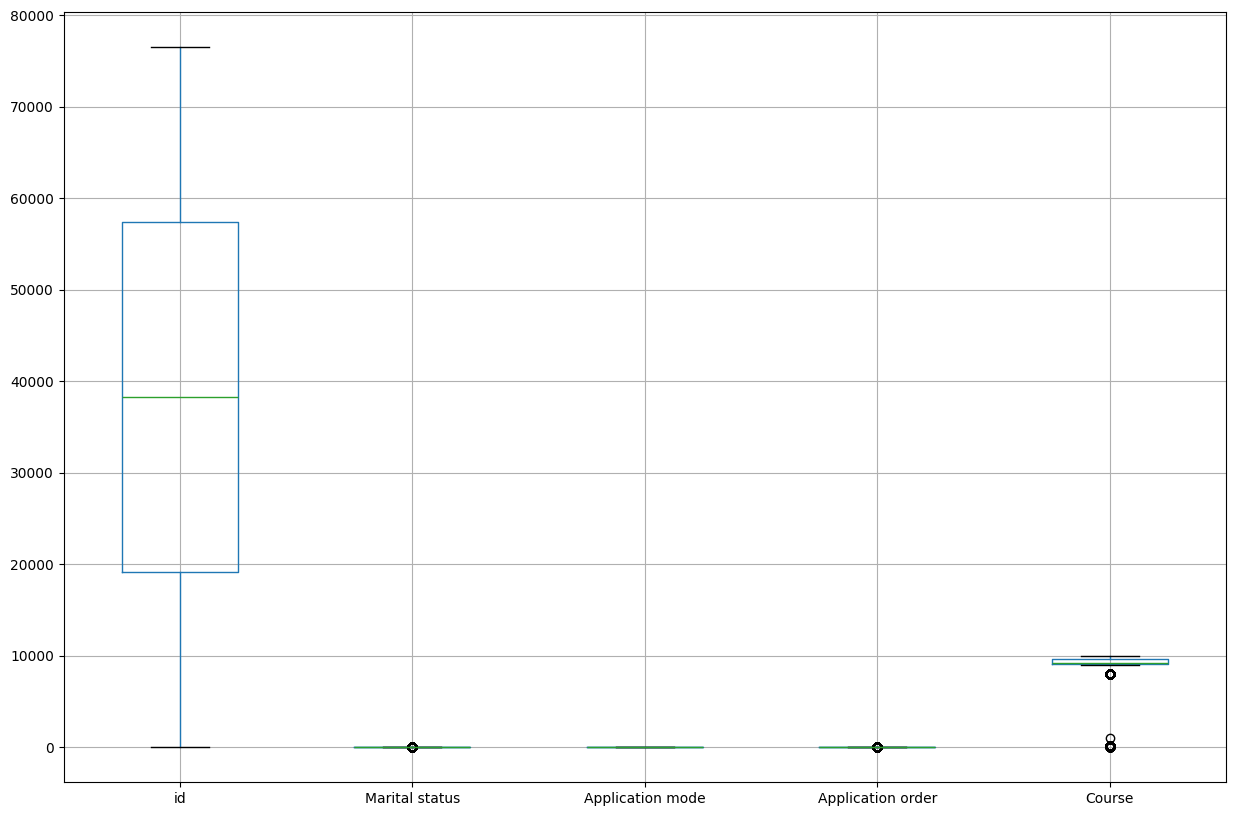

In [3]:
#boc plot for detect outliers
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the box plots for all columns
df.iloc[:,:5].boxplot()

# Show the plot
plt.show()

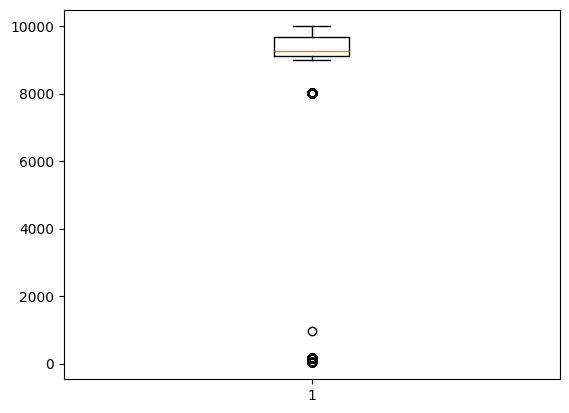

In [4]:
plt.boxplot(df['Course'])
plt.show()

In [5]:
# Calculate the IQR for the Income column
Q1 = df['Course'].quantile(0.25)
Q3 = df['Course'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Course'] < (Q1 - 1.5 * IQR)) | (df['Course'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Course column:", len(outliers))

Number of outliers in the Course column: 5371


In [6]:
df = df[~((df['Course'] < (Q1 - 1.5 * IQR)) | (df['Course'] > (Q3 + 1.5 * IQR)))]

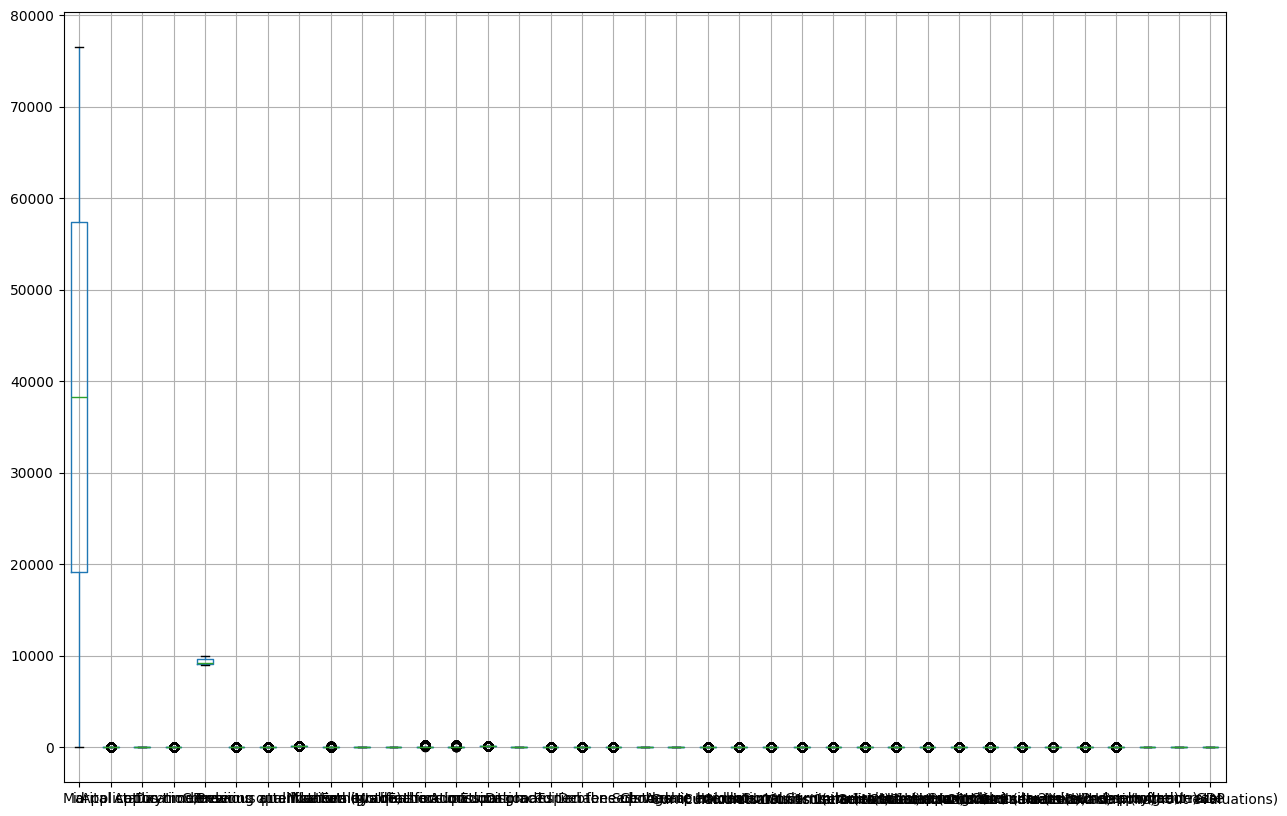

In [7]:
#boc plot for detect outliers
import matplotlib.pyplot as plt

# Plot the box plots for all columns
df.boxplot()

# Show the plot
plt.show()

In [8]:
df.drop(columns=['Course'], inplace=True)

C:\Users\CHATHURANGA\AppData\Local\Temp\ipykernel_9044\1783372550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Course'], inplace=True)


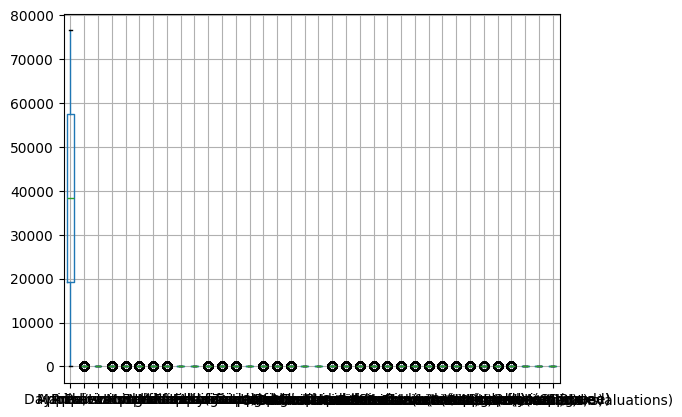

In [9]:

# Plot the box plots for all columns
df.boxplot()

# Show the plot
plt.show()

In [10]:
print(df['Target'].unique())

['Graduate' 'Dropout' 'Enrolled']


In [11]:
df_model =df.copy()


In [12]:
df_encoded = pd.get_dummies(df_model, columns=['Target'])

In [13]:
df_encoded

,id,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Enrolled,Target_Graduate
0,0,1,1,1,1,1,126.0,1,1,19,...,7,6,12.428571,0,11.1,0.6,2.02,False,False,True
1,1,1,17,1,1,1,125.0,1,19,19,...,9,0,0.000000,0,11.1,0.6,2.02,True,False,False
2,2,1,17,2,1,1,137.0,1,3,19,...,0,0,0.000000,0,16.2,0.3,-0.92,True,False,False
3,3,1,1,3,1,1,131.0,1,19,3,...,11,7,12.820000,0,11.1,0.6,2.02,False,True,False
4,4,1,1,2,1,1,132.0,1,19,37,...,12,6,12.933333,0,7.6,2.6,0.32,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,1,1,121.0,1,19,1,...,8,5,10.600000,0,13.9,-0.3,0.79,False,False,True
76514,76514,1,1,6,1,1,125.0,1,1,38,...,9,6,13.875000,0,9.4,-0.8,-3.12,False,False,True
76515,76515,5,17,1,1,1,138.0,1,37,37,...,8,5,11.400000,1,9.4,-0.8,-3.12,False,True,False
76516,76516,1,1,3,1,1,136.0,1,38,37,...,0,0,0.000000,0,7.6,2.6,0.32,True,False,False


In [14]:
x=df_encoded.iloc[:,:36]
x.drop(columns=['id'], inplace=True)
x

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,1,1,126.0,1,1,19,5,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,1,17,1,1,1,125.0,1,19,19,9,...,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,1,17,2,1,1,137.0,1,3,19,2,...,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,1,1,3,1,1,131.0,1,19,3,3,...,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,1,1,2,1,1,132.0,1,19,37,4,...,0,0,7,12,6,12.933333,0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,1,1,121.0,1,19,1,7,...,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79
76514,1,1,6,1,1,125.0,1,1,38,4,...,0,0,6,9,6,13.875000,0,9.4,-0.8,-3.12
76515,5,17,1,1,1,138.0,1,37,37,9,...,2,0,5,8,5,11.400000,1,9.4,-0.8,-3.12
76516,1,1,3,1,1,136.0,1,38,37,5,...,0,0,6,0,0,0.000000,0,7.6,2.6,0.32


In [15]:
y=df_encoded.iloc[:,-3:]
y

,Target_Dropout,Target_Enrolled,Target_Graduate
0,False,False,True
1,True,False,False
2,True,False,False
3,False,True,False
4,False,False,True
...,...,...,...
76513,False,False,True
76514,False,False,True
76515,False,True,False
76516,True,False,False


In [16]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Apply Z-score standardization to normalize the data
df_standardized = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [17]:
df_standardized

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.235980,-0.891307,-0.537176,0.245748,-0.302433,-0.580647,-0.065,-1.206830,-0.284776,-0.204473,...,-0.146384,-0.134976,-0.113128,-0.147055,0.690675,0.456054,-0.13826,-0.162683,-0.449620,0.924921
1,-0.235980,0.079735,-0.537176,0.245748,-0.302433,-0.672838,-0.065,-0.036232,-0.284776,0.021722,...,-0.146384,-0.134976,-0.113128,0.469112,-1.544595,-1.881609,-0.13826,-0.162683,-0.449620,0.924921
2,-0.235980,0.079735,0.261922,0.245748,-0.302433,0.433445,-0.065,-1.076763,-0.284776,-0.374120,...,-0.146384,-0.134976,-0.113128,-2.303638,-1.544595,-1.881609,-0.13826,1.761438,-0.664925,-0.379571
3,-0.235980,-0.891307,1.061020,0.245748,-0.302433,-0.119697,-0.065,-0.036232,-1.357213,-0.317571,...,-0.146384,-0.134976,1.620012,1.085278,1.063220,0.529677,-0.13826,-0.162683,-0.449620,0.924921
4,-0.235980,-0.891307,0.261922,0.245748,-0.302433,-0.027506,-0.065,-0.036232,0.921716,-0.261022,...,-0.146384,-0.134976,0.753442,1.393361,0.690675,0.550994,-0.13826,-1.483157,0.985745,0.170623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71142,-0.235980,0.079735,-0.537176,0.245748,-0.302433,-1.041598,-0.065,-0.036232,-1.491267,-0.091375,...,-0.146384,-0.134976,-0.113128,0.161028,0.318130,0.112122,-0.13826,0.893697,-1.095535,0.379164
71143,-0.235980,-0.891307,3.458313,0.245748,-0.302433,-0.672838,-0.065,-1.206830,0.988743,-0.261022,...,-0.146384,-0.134976,-0.113128,0.469112,0.690675,0.728110,-0.13826,-0.804056,-1.454376,-1.355721
71144,9.501169,0.079735,-0.537176,0.245748,-0.302433,0.525635,-0.065,1.134366,0.921716,0.021722,...,4.683102,-0.134976,-0.979698,0.161028,0.318130,0.262593,1.99045,-0.804056,-1.454376,-1.355721
71145,-0.235980,-0.891307,1.061020,0.245748,-0.302433,0.341254,-0.065,1.199399,0.921716,-0.204473,...,-0.146384,-0.134976,-0.113128,-2.303638,-1.544595,-1.881609,-0.13826,-1.483157,0.985745,0.170623


In [127]:
import tensorflow as tf


# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')  # Output layer with 3 units for 3 classes
])

model.build(input_shape=(None, 35))
# Print a summary of the model architecture
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                2304      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 3)                 99        
                                                                 
Total params: 4483 (17.51 KB)
Trainable params: 4483 (17.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [125]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56917, 35), (14230, 35), (56917, 3), (14230, 3))

In [128]:
# Compile your model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train your model
model.fit(X_train,y_train, epochs=10,batch_size=1)

Epoch 1/10
56917/56917 [==============================] - 133s 2ms/step - loss: 0.5802 - accuracy: 0.7772
Epoch 2/10
56917/56917 [==============================] - 121s 2ms/step - loss: 0.5139 - accuracy: 0.7986
Epoch 3/10
56917/56917 [==============================] - 131s 2ms/step - loss: 0.5079 - accuracy: 0.8024
Epoch 4/10
56917/56917 [==============================] - 126s 2ms/step - loss: 0.5032 - accuracy: 0.8056
Epoch 5/10
56917/56917 [==============================] - 124s 2ms/step - loss: 0.4995 - accuracy: 0.8074
Epoch 6/10
56917/56917 [==============================] - 124s 2ms/step - loss: 0.4963 - accuracy: 0.8087
Epoch 7/10
56917/56917 [==============================] - 126s 2ms/step - loss: 0.4939 - accuracy: 0.8112
Epoch 8/10
56917/56917 [==============================] - 129s 2ms/step - loss: 0.4928 - accuracy: 0.8118
Epoch 9/10
56917/56917 [==============================] - 128s 2ms/step - loss: 0.4933 - accuracy: 0.8110
Epoch 10/10
56917/56917 [=====================

In [129]:
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, convert it to class labels
true_classes = np.argmax(y_test, axis=1)


# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(true_classes, predicted_classes)
print("Classification Report:")
print(class_report)

445/445 [==============================] - 1s 3ms/step
Accuracy: 0.80
Confusion Matrix:
[[3249  767  403]
 [ 145 1463 1290]
 [  14  206 6693]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      4419
           1       0.60      0.50      0.55      2898
           2       0.80      0.97      0.87      6913

    accuracy                           0.80     14230
   macro avg       0.78      0.74      0.75     14230
weighted avg       0.81      0.80      0.79     14230



In [39]:
df_test=pd.read_csv('data/test.csv')
df_test.drop(columns=['Course','id'], inplace=True)
df_test

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,1,1,141.0,1,3,1,2,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,1,1,1,1,1,128.0,1,1,19,4,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,1,1,1,1,1,118.0,1,1,19,4,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,1,44,1,1,39,130.0,1,1,19,3,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,1,39,1,1,1,110.0,1,1,37,5,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,1,1,2,1,1,128.0,1,38,37,7,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,2,39,1,1,19,133.1,1,19,37,9,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,1,1,1,1,1,127.0,1,1,1,4,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,1,1,3,1,1,132.0,1,19,19,5,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [121]:
scaler = StandardScaler()

# Apply Z-score standardization to normalize the data
df_standardized = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)
df_standardized

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.249023,-0.904712,-0.524549,0.29825,-0.307212,0.796651,-0.061289,-1.099430,-1.514754,-0.378413,...,-0.143296,-0.147375,1.285135,-2.118802,-1.469064,-1.766338,-0.136585,0.897514,-1.089794,0.389264
1,-0.249023,-0.904712,-0.524549,0.29825,-0.307212,-0.397591,-0.061289,-1.229438,-0.304858,-0.262085,...,-0.143296,-0.147375,0.034924,-0.371118,0.712878,0.689656,-0.136585,-0.158656,-0.448201,0.935535
2,-0.249023,-0.904712,-0.524549,0.29825,-0.307212,-1.316238,-0.061289,-1.229438,-0.304858,-0.262085,...,-0.143296,-0.147375,0.034924,1.085285,0.349221,0.234843,-0.136585,1.501040,1.120136,-1.764733
3,-0.249023,1.677245,-0.524549,0.29825,4.123156,-0.213861,-0.061289,-1.229438,-0.304858,-0.320249,...,-0.143296,3.272438,1.285135,1.959127,0.349221,0.234843,-0.136585,-0.988505,0.122103,1.597278
4,-0.249023,1.377018,-0.524549,0.29825,-0.307212,-2.051156,-0.061289,-1.229438,0.905039,-0.203921,...,-0.143296,-0.147375,0.034924,0.502724,-0.014436,0.174201,4.144503,-1.478870,0.977560,0.180526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,-0.249023,-0.904712,0.284739,0.29825,-0.307212,-0.397591,-0.061289,1.175709,0.905039,-0.087593,...,-0.143296,-0.147375,-3.715707,-2.118802,-1.469064,-1.766338,-0.136585,1.501040,1.120136,-1.764733
51008,2.033667,1.377018,-0.524549,0.29825,1.791383,0.070919,-0.061289,-0.059367,0.905039,0.028735,...,-0.143296,-0.147375,-0.590181,-0.662399,-1.469064,-1.766338,-0.136585,-0.799903,-1.446235,-1.347257
51009,-0.249023,-0.904712,-0.524549,0.29825,-0.307212,-0.489455,-0.061289,-1.229438,-1.514754,-0.262085,...,-0.143296,-0.147375,-3.715707,-2.118802,-1.469064,-1.766338,-0.136585,1.501040,1.120136,-1.764733
51010,-0.249023,-0.904712,1.094027,0.29825,-0.307212,-0.030132,-0.061289,-0.059367,-0.304858,-0.203921,...,-0.143296,-0.147375,0.034924,0.502724,-0.378093,0.598693,-0.136585,-1.478870,0.977560,0.180526


In [117]:
x_predict=df_standardized
x_predict.shape

(51012, 35)

In [131]:
y_test_pred = model.predict(x_predict)
# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(y_test_pred, axis=1)


label_mapping = {0: "Dropout", 1: "Enrolled", 2: "Graduate"}

string_labels = [label_mapping[label] for label in predicted_classes]
df_id = pd.read_csv('data/test.csv')['id']
# Ensure both lists are of the same length
assert len(df_id) == len(string_labels), "Mismatch between IDs and predictions"

# Create a DataFrame with IDs and predicted labels
result = pd.DataFrame({
    'id': df_id,
    'label': string_labels
})
result

1595/1595 [==============================] - 4s 2ms/step


,id,label
0,76518,Dropout
1,76519,Enrolled
2,76520,Graduate
3,76521,Enrolled
4,76522,Dropout
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [54]:
result.to_csv('data/submission.csv', index=False)